# Final Report


**Juan Camilo Salazar**


# Report 

This report is based on the dataset give by apprentice chef. During this analysis you are going to get the insight obtain from the analysis. This report contain two machine learning models. The first analysis is to understand which features will predict the revenue from the customers. Thus, this analysis is based on a regression analysis, where the revenue will be predict  over the first year of each customer´s. The second model has the purpose to understand which is a great target for  Halfway promotion. Finally, the report has a conclusion for company decisions.  


# First Model Regression Analysis ARD


Based on the dataset that was provide. The best performance of the model tryed was the Bayesian Automatic Relevance Determination which shows a test score of 0.76 which mean that the accuary of revenue model is 76%. This model was based on 44 variables. 

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt #graphical
import seaborn as sns #graphical
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression
import sklearn.linear_model # linear models


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


file = './datasets/Apprentice_Chef_Dataset.xlsx'

chef = pd.read_excel(io = file)

#creating a variable with coninuous variable from chef dataset

continuous_data = ['REVENUE','TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH',
                   'CONTACTS_W_CUSTOMER_SERVICE','PRODUCT_CATEGORIES_VIEWED',
                   'AVG_TIME_PER_SITE_VISIT','CANCELLATIONS_BEFORE_NOON',
                   'CANCELLATIONS_AFTER_NOON','MOBILE_LOGINS','PC_LOGINS',
                   'WEEKLY_PLAN','EARLY_DELIVERIES','LATE_DELIVERIES',
                   'AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE','MEDIAN_MEAL_RATING',
                   'AVG_CLICKS_PER_VISIT','TOTAL_PHOTOS_VIEWED']


# log transfomation REVENUE and saving it in to the dataset
chef['log_REVENUE'] = np.log10(chef['REVENUE'])

# log transfomation Avg time per visit
chef['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(chef['AVG_TIME_PER_SITE_VISIT'])

# log transfomation Avg Preparation video  and saving it in to the dataset
chef['log_AVG_PREP_VID_TIME'] = np.log10(chef['AVG_PREP_VID_TIME'])

# log transfomation Total Meals Ordered and saving it in to the dataset

chef['log_TOTAL_MEALS_ORDERED'] = np.log10(chef['TOTAL_MEALS_ORDERED'])

# log transfomation Unique Meals Purch and saving it in to the dataset

chef['log_UNIQUE_MEALS_PURCH'] = np.log10(chef['UNIQUE_MEALS_PURCH'])

# log transfomation Concat Customer Service Purch and saving it in to the dataset

chef['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(chef['CONTACTS_W_CUSTOMER_SERVICE'])

# instantiating an imputation value 
fill = 0 

# imputing 'FAMILY NAME'
chef['FAMILY_NAME'] = chef['FAMILY_NAME'].fillna(fill)

#counting the number of zeros 

CANCELATION_BEFORE_NOON_ZERO = len(chef['CANCELLATIONS_BEFORE_NOON'][chef['CANCELLATIONS_BEFORE_NOON']==0])
CANCELATION_AFTER_NOON_ZERO = len(chef['CANCELLATIONS_AFTER_NOON'][chef['CANCELLATIONS_AFTER_NOON']==0])
MOBILE_LOGINS = len(chef['MOBILE_LOGINS'][chef['MOBILE_LOGINS']==0])
WEEKLY_PLAN_ZERO = len(chef['WEEKLY_PLAN'][chef['WEEKLY_PLAN']==0])
EARLY_DELIVERIES_ZERO = len(chef['EARLY_DELIVERIES'][chef['EARLY_DELIVERIES']==0])
LATE_DELIVERIES_ZERO = len(chef['LATE_DELIVERIES'][chef['LATE_DELIVERIES']==0])
MASTER_CLASSES_ATTENDED_ZERO = len(chef['MASTER_CLASSES_ATTENDED'][chef['MASTER_CLASSES_ATTENDED']==0])
TOTAL_PHOTOS_VIEWED_ZERO = len(chef['TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED']==0])
MOBILE_NUMBER_O = len(chef['MOBILE_NUMBER'][chef['MOBILE_NUMBER']==0])


# creatinga varibales 1 - 0 
chef['Canceled_before_noon'] = 0
chef['Canceled_after_noon'] = 0
chef['Mobile_Login'] = 0
chef['has_weekly_plan'] = 0
chef['Was_early_delivered'] = 0
chef['was_late_delivered'] = 0
chef['Attended_master_class'] = 0
chef['View_photos'] = 0
chef['MOBILE_NUMBER_O'] = 0




for index, value in chef.iterrows():
    
    # Total_Bsmt_SF
    if chef.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 0:
        chef.loc[index, 'Canceled_before_noon'] = 1
    
    if chef.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        chef.loc[index, 'Canceled_after_noon'] = 1
        
    if chef.loc[index, 'MOBILE_LOGINS'] > 0:
        chef.loc[index, 'Mobile_Login'] = 1
            
        
    if chef.loc[index, 'WEEKLY_PLAN'] > 0:
        chef.loc[index, 'has_weekly_plan'] = 1
        
    if chef.loc[index, 'EARLY_DELIVERIES'] > 0:
        chef.loc[index, 'Was_early_delivered'] = 1
        
    if chef.loc[index, 'LATE_DELIVERIES'] > 0:
        chef.loc[index, 'was_late_delivered'] = 1
    
    if chef.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        chef.loc[index, 'Attended_master_class'] = 1
    
    if chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        chef.loc[index, 'View_photos'] = 1
        
    if chef.loc[index, 'MOBILE_NUMBER'] > 0:
        chef.loc[index, 'MOBILE_NUMBER_O'] = 1
        
    if chef.loc[index, 'PACKAGE_LOCKER'] > 0:
        chef.loc[index, 'HAS_PACKAGE_LOCKER'] = 1
        
        

        
# Creating a Variable locker with Refrigeration

chef['PACKAGE_LOCKER_and_REF'] = chef['PACKAGE_LOCKER'] + chef['REFRIGERATED_LOCKER']
# creating a binary variable
chef['PACKAGE_LOCKER_and_REF'] = chef['PACKAGE_LOCKER_and_REF'] - 1


# Orders delivered not as Schedule
chef['Not_as_schedule'] = chef['EARLY_DELIVERIES'] +chef['LATE_DELIVERIES']

# Average time per visit on the phone

chef['Avg_time_mobile_phone'] = chef['AVG_TIME_PER_SITE_VISIT']*chef['MOBILE_NUMBER']

# total Cancelations
chef['Total_Cancel'] = chef['CANCELLATIONS_BEFORE_NOON'] + chef['CANCELLATIONS_AFTER_NOON']

# customer services if attended master class

chef['contact_if_attended_class'] = chef['Attended_master_class'] * chef['CONTACTS_W_CUSTOMER_SERVICE']
        
# rating if attended to master class 

chef['raiting_if_attended_class'] = chef['MEDIAN_MEAL_RATING'] * chef['Attended_master_class']

# rate if view photos 
chef['Rate_if_view_photos'] = chef['View_photos'] * chef['MEDIAN_MEAL_RATING']
    
# rate if order by mobile     
chef['Mobile_Orders'] = chef['TOTAL_MEALS_ORDERED'] * chef['Mobile_Login']
    
x_variables = [ 'log_TOTAL_MEALS_ORDERED' , 'TOTAL_MEALS_ORDERED' ,'log_UNIQUE_MEALS_PURCH', 'UNIQUE_MEALS_PURCH' ,   
                'log_AVG_PREP_VID_TIME',  'log_CONTACTS_W_CUSTOMER_SERVICE' ,                        
                'LARGEST_ORDER_SIZE' , 'MEDIAN_MEAL_RATING','Attended_master_class', 
               'View_photos' ,'log_AVG_TIME_PER_SITE_VISIT', 'Avg_time_mobile_phone',
               'TOTAL_PHOTOS_VIEWED','contact_if_attended_class', 'raiting_if_attended_class', 'Rate_if_view_photos',
              'PRODUCT_CATEGORIES_VIEWED']


chef_data   = chef.drop(['CROSS_SELL_SUCCESS',
                                                 'REVENUE',
                                                 'log_REVENUE', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME','HAS_PACKAGE_LOCKER'],
                               axis = 1)


# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = chef[x_variables] # pvalues usefull before 
            #subset 

# preparing response variable
chef_target = chef['REVENUE']



# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            chef_data,     # x-variables
            chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219) 





# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(2))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(2))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(2)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(2)





# zipping each feature name to its coefficient
ard_model_values = zip(chef_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))
            
            
# saving prediction and deviatoin in a dataset

prediction_results = pd.DataFrame(data = {
    'Original Sale Prices' : y_test_FULL,
    'ARD Predictions'      : ard_pred.round(decimals = 2),
    'ARD Deviation'        : ard_pred.round(decimals = 2) - y_test_FULL,
    })

prediction_results.to_excel(excel_writer = 'linear_ARD_model_predictions.xlsx',
                            index = False)

# saving the model in a dataset

prediction_results = pd.DataFrame(data = {
    'Original Sale Prices' : y_test_FULL,
    'ARD Predictions'      : ard_pred.round(decimals = 2),
    'ARD Deviation'        : ard_pred.round(decimals = 2) - y_test_FULL,
    })

# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)



Training Score: 0.72
Testing Score : 0.76
ARD Train-Test Gap : 0.04


The model's most important features and insight present are if the user views the categories, the revenue will increase in 5.1. Likewise, if the video's view time and if it views the product's photos on the platform, it will significantly increase the revenue. Besides, if a user attended to master class or rated, it will have a positive impact. But, if the user rated the meal and participated in the class will have a bigger impact. However, if the user logins from a mobile or the place where he live has a  packages locker service or package room, this user's revenue will decrease. 



# Classification Model Tuned Tree

To evaluate the cross-selling promotion "Halfway There". We used a CART model. The model with the highes accuracy is the Tuned Tree, which has a accuracy of 0.71.

In [2]:
# importing libraries
import random            as rand                     # random number gen
import numpy             as np
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler


dataset_file = 'Apprentice_Chef_Dataset.xlsx'


chef = pd.read_excel(dataset_file)

#####

########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()
    
######
fill = 'a'

# imputing 'FAMILY NAME'
chef['FAMILY_NAME'] = chef['FAMILY_NAME'].fillna(fill)
# Splitting personal emails (creating 5 new features)

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    class_email = chef.loc[index,'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(class_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

#concatenating with original DataFrame
# renaming column to concatenate
email_df.columns = ['0' , 'EMAIL_DOMAIN']


chef = pd.concat([chef, email_df['EMAIL_DOMAIN']],
                     axis = 1)

# 3 email domain class
PERSONAL_EMAIL= ['@gmail.com', '@yahoo.com', '@protonmail.com']
JUNK_EMAIL = ['@me.com', '@aol.com', '@hotmail.com', '@ive.com', '@msn.com', '@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in chef['EMAIL_DOMAIN']:
    
    if '@' + domain in PERSONAL_EMAIL:
        placeholder_lst.append('PERSONAL')
        

    elif '@' + domain in JUNK_EMAIL:
        placeholder_lst.append('JUNK')


    else:
        placeholder_lst.append('PROFESSIONAL')


# concatenating with original_2
chef['DOMAIN_CLASS'] = pd.Series(placeholder_lst)

####

#creationg variable for names
Len_Name = []
for val in chef['NAME']:
    Len_Name_1  = len(val)
    
    Len_Name.append(Len_Name_1)
    
Len_Name_df = pd.DataFrame(Len_Name)

# renaming column to concatenate
Len_Name_df.columns = ['Len_Name_1']

chef = pd.concat([chef, Len_Name_df['Len_Name_1']],
                     axis = 1)

#creating variable for surname
Len_sur_Name = []
for val in chef['FAMILY_NAME']:
    Len_sur_Name_1  = len(val)
    
    Len_sur_Name.append(Len_sur_Name_1)

Len_sur_Name_df = pd.DataFrame(Len_sur_Name)

# renaming column to concatenate
Len_sur_Name_df.columns = ['Len_sur_Name_1']

chef = pd.concat([chef, Len_sur_Name_df['Len_sur_Name_1']],
                     axis = 1)

# Creating variable 1/0 for emails
EMAIL_CLASS = pd.get_dummies(chef['DOMAIN_CLASS'])


# joining codings together
chef = chef.join([EMAIL_CLASS])


# saving new columns
email_dummies_columns = chef.columns

########
#dropping variables
chef = chef.drop(['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'EMAIL_DOMAIN','DOMAIN_CLASS'],axis=1)

# first time 
chef['MOBILE_LOGINS_1'] = (chef['MOBILE_LOGINS'] == 1).astype(int)

# first time 
chef['MOBILE_LOGINS_1'] = (chef['MOBILE_LOGINS'] == 1).astype(int)

chef['TOTAL_CANCELATION'] = chef['CANCELLATIONS_BEFORE_NOON'] + chef['CANCELLATIONS_AFTER_NOON']

chef['Total_logins'] = chef['MOBILE_LOGINS'] + chef['PC_LOGINS']


# explanatory variables
chef_data = chef.drop('CROSS_SELL_SUCCESS' , axis = 1)



# Response variables

chef_target = chef.loc[ : , 'CROSS_SELL_SUCCESS']


# Train-test-split with stratification
x_train, x_test, y_train, y_test = train_test_split(chef_data,
                                                    chef_target,
                                                   test_size = 0.25,
                                                   random_state = 219,
                                                   stratify = chef_target)

# merging training data for stasmodels

chef_train  = pd.concat([x_train, y_train], axis = 1)


######################### ESTE
logistic_small = smf.logit(formula = """ CROSS_SELL_SUCCESS ~  

                                                
                                                 
                                                 MOBILE_NUMBER + 
                                                 TASTES_AND_PREFERENCES +  
                                                 EARLY_DELIVERIES + 
                                                 JUNK +
                                                 PROFESSIONAL+
                                                 REFRIGERATED_LOCKER +  
                                                 TOTAL_CANCELATION +
                                                CANCELLATIONS_BEFORE_NOON +
                                                 MOBILE_LOGINS_1+
                                                 MASTER_CLASSES_ATTENDED+
                                                 Len_Name_1 +
                                                 Total_logins 
                                                 


""" , data = chef_train)

# fitting the model object 
results_logistic = logistic_small.fit()


# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {
  
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['MOBILE_NUMBER', 'TASTES_AND_PREFERENCES', 
                   'EARLY_DELIVERIES' ,'JUNK', 'PROFESSIONAL','PC_LOGINS',
                   'REFRIGERATED_LOCKER',  'TOTAL_CANCELATION', 'CANCELLATIONS_BEFORE_NOON',
                   'Len_Name_1', 'MASTER_CLASSES_ATTENDED', 'Total_logins']

}

# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_sig_2']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = chef_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy

# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)
###

# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects

#####

########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')
        
        
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(X_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(X_test)


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(X_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(X_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()

# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 8,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(X_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(X_test)


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(X_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(X_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)

# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

# CART model packages
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects


# new packages
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer   


########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 5.0, 0.1)
warm_start_space = [True, False]
solver_space     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space,
              'solver'     : solver_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 100)


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 1000,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence0
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(chef_data, chef_target)





Optimization terminated successfully.
         Current function value: 0.542874
         Iterations 6


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 294 is smaller than n_iter=1000. Running 294 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter 

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", Conve

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iteration

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did 

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did 

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=219,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=1000, n_jobs=None,
                   param_distribut...8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
   

In [3]:
# INSTANTIATING a logistic regression model with tuned values
lr_tuned = lr_tuned_cv.best_estimator_




# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(X_test)


# saving scoring data 
lr_tuned_train_score = lr_tuned.score(X_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(X_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc



# new packages
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()

# declaring model performance objects
lr_train_acc = lr_tuned.score(X_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(X_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)

## Sample Solution for Homework ##

# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)

# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 250, # changed for the sake of time
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(chef_data, chef_target)



# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_




# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(X_test)

# SCORING the results
print('Training ACCURACY:', tree_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data 
tree_tuned_train_score = tree_tuned.score(X_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(X_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc


# confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()



print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")



Training ACCURACY: 0.7272
Testing  ACCURACY: 0.7515
AUC Score        : 0.7054

True Negatives : 51
False Positives: 105
False Negatives: 29
True Positives : 302



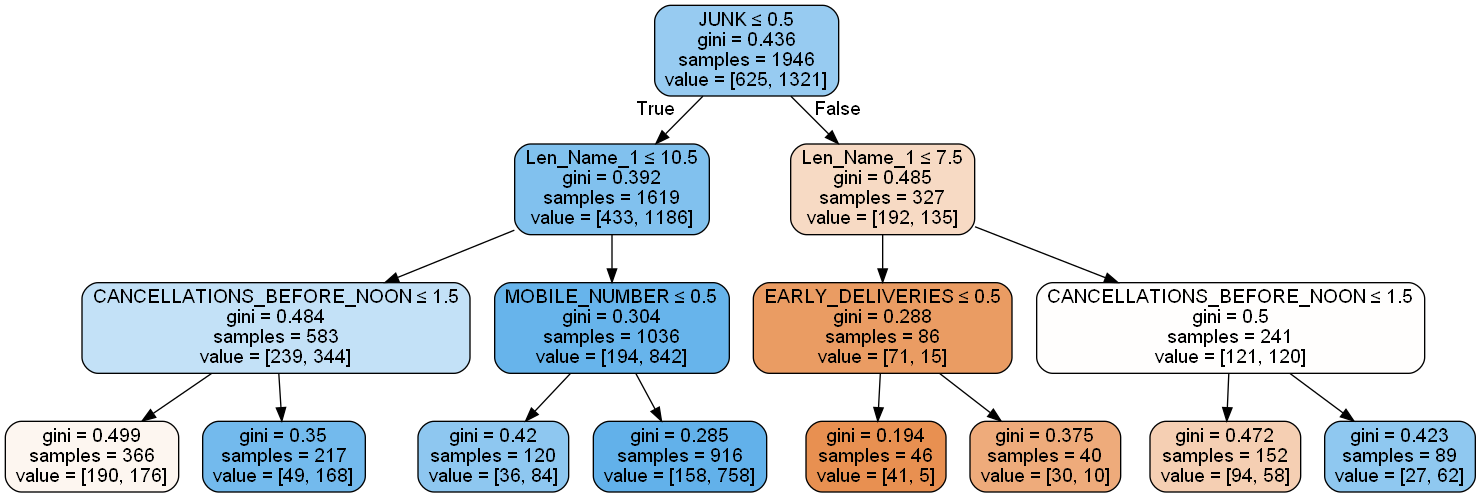

In [4]:
# calling display_tree
display_tree(tree       = tree_tuned,
             feature_df = X_train)

This model shows that the email of the user is the most important variable to take into account for the promotion.

Concluding this analysis is essential to incentivize the user to attend class. It will be great to have a class for a group of friends or to have topic classes, such as Mexican, Mediterranean, Indian, etc... after attending to class is important to be rate by the users. Here, Apprentice chef should create a positive incentive such as a discount on the next purchase. Finally, when the product has been delivered, it is crucial to give it to the user and not leave it in a package locker or room. For the promotion 'Halfway There,' if the user's name has a length lower than seven words and haven complain about deliveries, it is the best target. Finally, as an analyst, I recommend to creat with the promotion a positive incentive with an on time delivery. If the order is late Apprentice chef gives the user a discount on the next purchase.